# Inferential Statistics

## Probability Distribution
- random variable - satu titik data di dataset kita
    - discrete
        - setiap angka/ hasil yang spesifik bisa dihitung berapa kali didapatkan
        - misalkan hasil lempar dadu 6 sisi, kita bisa hitung dari 100 kali lempar, berapa kali dapat nilai 1, kalau misalnya 10 kali berarti kemungkinan dapat nilai 1 adalah 10/100 = 10%
        - untuk semua hasil kita plot di x-axis per hasil, di y-axis % probabilitas mendapat hasil tersebut, jadilah sebuah probability distribution
    - continuous
        - untuk random variable yang tipe continuous, maka probabilitas mendapatkan 1 angka spesifik adalah 0%
        - grafik probability distribution selalu dari histogram, kumpulan range of values

## Confidence Interval
membuat statement dengan menggunakan range angka.
1. mean: rata2 nilai murid kelas A adalah [60-70] [65-5, 65+5]
2. proporsi: [10-20%] [15-5, 15+5] murid kelas A dapat nilai diatas 80

rata2 nilai murid kelas A adalah [0-100] --> interval besar seperti ini biasanya confidence nya tinggi, mendekati 100% confidence (yakin 100%)

umumnya confidence di 95% saja.

Formula:   
- [Best_Estimate - Margin_of_error, Best_Estimate + Margin_of_error]
- Margin_of_error = z * standard_error
- z = 1.96 (di saat level confidence 95%)

1. mean
    - Best_Estimate = mean
    - standard_error = standard_deviation / np.sqrt(jumlah_data)

2. proporsi
    - Best_Estimate = proporsi = p
    - standard_error = np.sqrt( p * (1-p) / jumlah_data)

## Hypothesis Testing
teknik untuk membuat sebuah statement tentang data kita.

1. setelah membuat statement, kita tuliskan statement tersebut, dan kita beri nama "alternate hypothesis" H1
2. kita buat statement asumsi sekarang ini, statemeng yang berbalik dengan yang mau kita buat, dan kita beri nama "null hypothesis" H0
3. cari p-value
4. set 95% confidence, artinya error rate alpha = 0.05 (5%)
5. bandingkan p-value dan alpha
    - jika p-value < alpha = REJECT null hypothesis H0, kemungkinan besar statement awal kita H1 itu benar.
    - jika p-value >= alpha - FAIL to reject null hypothesis H0, tidak ada statement yang kita buat. statement awal yang mau kita buat, tidak bisa dibuat. tidak bisa bilang kalau H1 mungkin benar.


In [69]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
import seaborn as sns

import statsmodels.api as sm
import scipy.stats
import random
import warnings
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

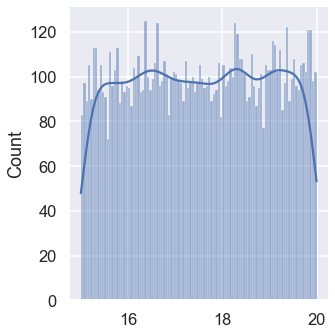

In [70]:
# kita akan membuat data yang bentuknya uniform distribution
data_uniform = scipy.stats.uniform.rvs(size=10000, loc=15, scale=5)
# data_uniform

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_uniform,
            bins=100,
            kde=True,)

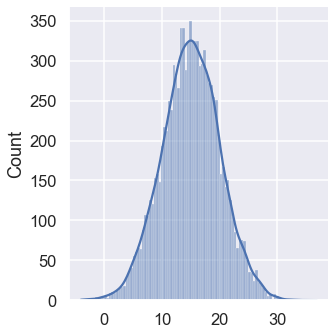

In [71]:
# kita akan membuat data yang bentuknya normal distribution
data_normal = scipy.stats.norm.rvs(size=10000, loc=15, scale=5)
# data_normal

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_normal,
            bins=100,
            kde=True,)

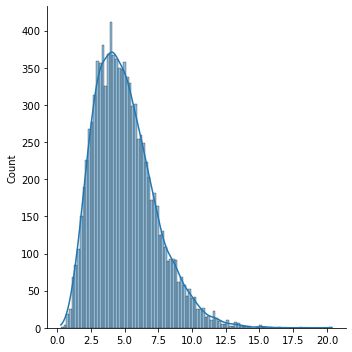

In [22]:
# kita akan membuat data yang bentuknya gamma distribution
data_gamma = scipy.stats.gamma.rvs(size=10000, a=5)
# data_gamma

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_gamma,
            bins=100,
            kde=True,)

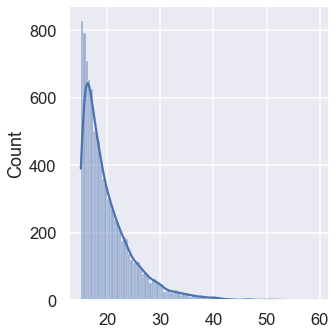

In [72]:
# kita akan membuat data yang bentuknya exponential distribution
data_exponential = scipy.stats.expon.rvs(size=10000, loc=15, scale=5)
# data_exponential

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_exponential,
            bins=100,
            kde=True,)

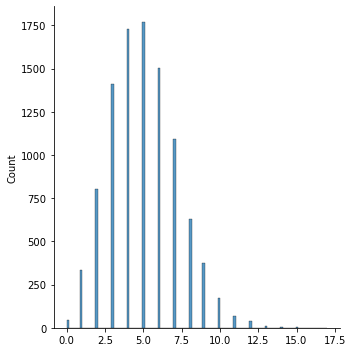

In [25]:
# kita akan membuat data yang bentuknya poisson distribution
data_poisson = scipy.stats.poisson.rvs(size=10000, mu=5)
# data_poisson

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_poisson,
            bins=100,)

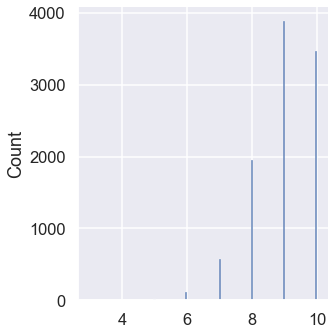

In [73]:
# kita akan membuat data yang bentuknya binomial distribution
data_binomial = scipy.stats.binom.rvs(size=10000, n=10, p=0.9)
# data_binomial

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_binomial,
            bins=100,)

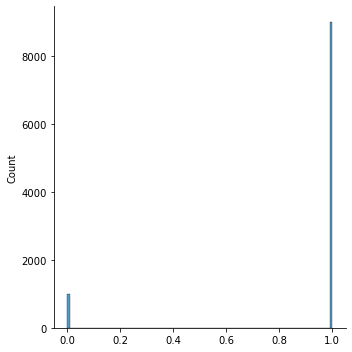

In [30]:
# kita akan membuat data yang bentuknya data_bernoulli distribution
# data_bernoulli = scipy.stats.binom.rvs(size=10000, n=1, p=0.9)
data_bernoulli = scipy.stats.bernoulli.rvs(size=10000, p=0.9)
# data_bernoulli

# kita plot datanya untuk melihat bentuk distribusi probability nya
sns.displot(data_bernoulli,
            bins=100,)

In [31]:
# Confidence Interval

# Formula:   
# - [Best_Estimate - Margin_of_error, Best_Estimate + Margin_of_error]
# - Margin_of_error = z * standard_error
# - z = 1.96 (di saat level confidence 95%)

# 1. mean
#     - Best_Estimate = mean
#     - standard_error = standard_deviation / np.sqrt(jumlah_data)

# 2. proporsi
#     - Best_Estimate = proporsi = p
#     - standard_error = np.sqrt( p * (1-p) / jumlah_data)

In [34]:
# import data
df_heart = pd.read_csv("dataset/heart.csv")
df_heart.head(10)

# sex (1 = male; 0 = female)
# target (0 = sehat; 1 = sakit jantung)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [35]:
# explore data
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [36]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
df_heart["sex"].unique()

array([1, 0], dtype=int64)

In [38]:
df_heart["target"].unique()

array([0, 1], dtype=int64)

In [39]:
df_heart["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [44]:
# berapa persen wanita punya sakit jantung?

# jumlah data yang wanita DAN punya sakit jantung
kondisi1 = df_heart["sex"] == 0 # wanita
kondisi2 = df_heart["target"] == 1 # sakit

jumlah_wanita_sakit = len(df_heart[kondisi1 & kondisi2])
print(jumlah_wanita_sakit)

# jumlah wanita
jumlah_wanita = len(df_heart[kondisi1])
print(jumlah_wanita)

# proporsi wanita sakit
p = jumlah_wanita_sakit / jumlah_wanita
print(p)

226
312
0.7243589743589743


In [49]:
# Formula:   
# - [Best_Estimate - Margin_of_error, Best_Estimate + Margin_of_error]
# - Margin_of_error = z * standard_error
# - z = 1.96 (di saat level confidence 95%)
# - Best_Estimate = proporsi = p
# - standard_error = np.sqrt( p * (1-p) / jumlah_data)

be = p
se = np.sqrt( p * (1-p) / jumlah_wanita)
z = 1.96
me = z * se
print((be - me, be + me))

(0.6747765651256307, 0.773941383592318)


In [46]:
# 67-77% persen wanita punya sakit jantung

In [50]:
# shortcut cari confidence interval pakai package statsmodels
n = jumlah_wanita
p_fm = p
sm.stats.proportion_confint(n * p_fm, n)

(0.6747774762140357, 0.773940472503913)

In [52]:
df_heart["gender"] = df_heart["sex"].replace({1: "pria", 0:"wanita"})

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,pria
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,pria
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,pria
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,pria
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,wanita


In [53]:
df_heart["kesehatan"] = df_heart["target"].replace({1: "sakit", 0:"sehat"})

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,kesehatan
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,pria,sehat
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,pria,sehat
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,pria,sehat
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,pria,sehat
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,wanita,sehat


In [55]:
# cari CI proporsi pria yang sakit jantung

# berapa proporsi pria yang sakit jantung

# berapa pria
jumlah_pria = len(df_heart[df_heart["gender"]=="pria"])
print(jumlah_pria)

# berapa pria yang sakit
jumlah_pria_sakit = len(df_heart[   (df_heart["gender"]=="pria") &
                                    (df_heart["kesehatan"] == "sakit")
                                ])
print(jumlah_pria_sakit)

# proporsi pria yang sakit jantung = jumlah pria yang sakit / jumlah pria
p = jumlah_pria_sakit / jumlah_pria
print(p)

n = jumlah_pria


713
300
0.42075736325385693


In [56]:
# Formula:   
# - [Best_Estimate - Margin_of_error, Best_Estimate + Margin_of_error]
# - Margin_of_error = z * standard_error
# - z = 1.96 (di saat level confidence 95%)
# - Best_Estimate = proporsi = p
# - standard_error = np.sqrt( p * (1-p) / jumlah_data)

be = p
se = np.sqrt( p * (1-p) / n)
z = 1.96
me = z * se
print((be - me, be + me))

(0.3845199298886166, 0.45699479661909725)


In [57]:
# 38 - 46% pria punya sakit jantung

In [58]:
sm.stats.proportion_confint(n * p, n)

(0.3845205957599584, 0.45699413074775547)

In [60]:
# CI rata-rata umur wanita yang datang ke rumah sakit ini untuk cekup jantung

# Formula:   
# - [Best_Estimate - Margin_of_error, Best_Estimate + Margin_of_error]
# - Margin_of_error = z * standard_error
# - z = 1.96 (di saat level confidence 95%)
# - Best_Estimate = mean
# - standard_error = standard_deviation / np.sqrt(jumlah_data)

df_wanita = df_heart[df_heart["gender"]=="wanita"]
data = df_wanita["age"]

be = data.mean()
se = data.std() / np.sqrt(len(data))
z = 1.96
me = z * se

print((be - me, be + me))

(54.8098421182549, 56.88887583046304)


In [61]:
# rata2 wanita yang datang cekup jantung ada di umur 54.8-56.9

In [66]:
df_heart.groupby("gender").agg({"chol": [np.mean, np.std, np.size], "age": [np.mean, np.std, np.size]})

chol                        age               
              mean        std size       mean       std size
gender                                                      
pria    239.237027  43.155535  713  53.814867  8.875668  713
wanita  261.455128  64.466781  312  55.849359  9.368127  312

In [64]:
# CI umur pria yang datang cekup jantung

be = 53.814867
se = 8.875668 / np.sqrt(713)
z = 1.96
me = z * se

print((be - me, be + me))

(53.163370097492596, 54.4663639025074)


In [ ]:
# umur pria yang datang cekup jantung ada di sekitar 53-54 tahun

In [67]:
# cari CI tingkat kolesterol wanita
be = 261.455128
se = 64.466781 / np.sqrt(312)
z = 1.96
me = z * se

print((be - me, be + me))

(254.30169095203016, 268.6085650479699)


In [68]:
# tingkat kolesterol wanita rata-rata ada di 254-269

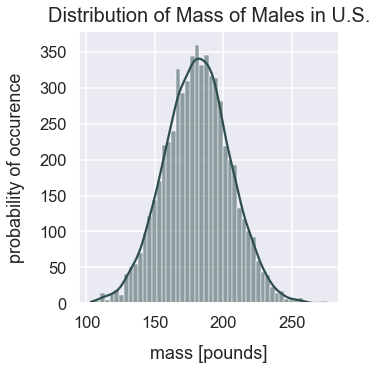

Text(0.5, 1.015, 'Distribution of Mass of Females in U.S.')

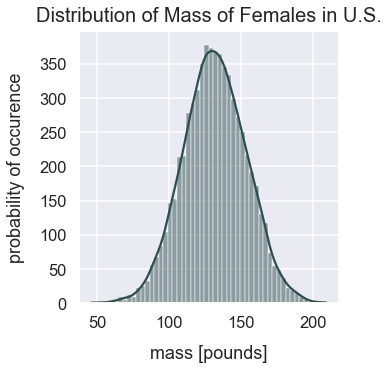

In [79]:
# resampling, data yg distribusi tidak normal kita buat lebih normal bentuknya

# bikin dua set data yang bentuknya normal distribution lalu digabungkan
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

df_males = pd.DataFrame(data={'pounds': normal_distribution_us_male_mass_pounds})
df_females = pd.DataFrame(data={'pounds': normal_distribution_us_female_mass_pounds})

# plot
sns.displot(df_males['pounds'], color="darkslategrey", kde=True)
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of Males in U.S.", y=1.015, fontsize=20)
plt.show()

sns.displot(df_females['pounds'], color="darkslategrey", kde=True)
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of Females in U.S.", y=1.015, fontsize=20)

Text(0.5, 1.015, 'Distribution of Mass of People in U.S.')

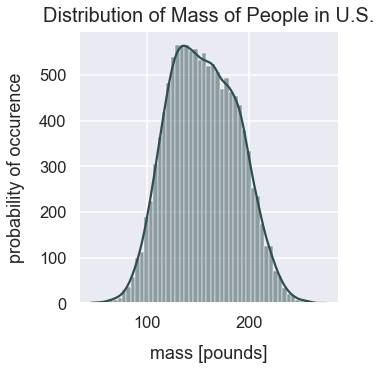

In [80]:
# plot
sns.displot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey", kde=True)
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20)

In [81]:
sample_means = []
n = 25
# ngambil 300 kali, setiap ngambil adalah 25 orang dari dataset diatas secara random
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

print(len(sample_means))

300


Text(19.940000000000005, 0.5, 'frequency of occurence')

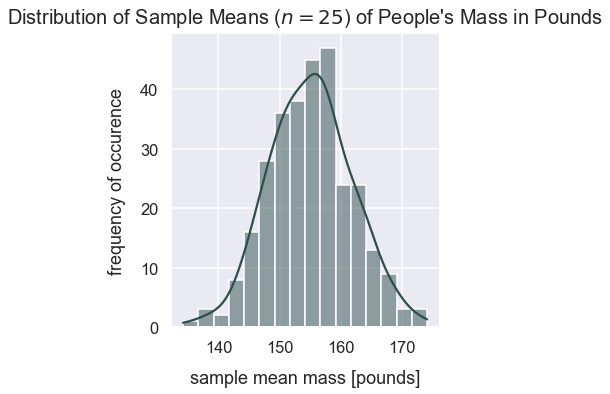

In [83]:
# plot
sns.displot(sample_means, color="darkslategrey", kde=True)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

In [93]:
# berapa CI rata2 berat badan orang US (data diatas)

data = np.array(sample_means)
print("mean", data.mean())
print("std", data.std())

n = 25

be = data.mean()
se = data.std() / np.sqrt(n)
print("se", se)
z = 1.96
me = z * se

print((be - me, be + me))

mean 155.12418330193915
std 6.734407481483423
se 1.3468814962966846
(152.48429556919766, 157.76407103468065)


# Hypothesis Testing

In [94]:
# one population proportion

# dulu 52% orang percaya
# sekarang 56% orang percaya, dari 1018 orang yang di survey

# sekarang semakin banyak orang yang percaya. sekarang > dulu

# H1: p > 0.52
# H0: p <= 0.52

n = 1018
pnull = 0.52
phat = 0.56

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

print(pvalue)

0.005069273865860533


In [95]:
alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis")
else:
    print("FAIL TO REJECT null hypothesis")


REJECT null hypothesis


In [102]:
# sekarang lebih banyak orang yang percaya

In [99]:
n_sakit = len(df_heart[df_heart["kesehatan"]=="sakit"])
n = len(df_heart)
print(n)
p_sakit = n_sakit/n
print(p_sakit)

1025
0.5131707317073171


In [101]:
# one population proportion

# dulu sekitar 50% orang punya sakit jantung

# sekarang 51% orang punya sakit jantung dari 1025 orang

# apakah sekarang lebih banyak orang yang sakit jantung?

# H1: p > 0.50
# H0: p <= 0.50

n = 1025
pnull = 0.50
phat = 0.51

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

print(pvalue)

alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis")
else:
    print("FAIL TO REJECT null hypothesis")


0.260943121938676
FAIL TO REJECT null hypothesis


In [103]:
# kita tidak bisa bilang kalau sekarang ada lebih banyak orang yang sakit jantung

In [110]:
# difference in population means
# ada 2 populasi, dan kita mau bandingkan rata2 dari kedua populasi ini
# tingkat chol wanita dan pria apakah berbeda?

# *mc = mean cholesterol

# H1: mc_wanita != mc_pria
# H0: mc_wanita == mc_pria

df_chol = df_heart[["chol","gender"]]

df_chol_w = df_chol[df_chol["gender"]=="wanita"]
df_chol_p = df_chol[df_chol["gender"]=="pria"]

# explore data, cek jumlah data, rata2, dan std setiap populasi (pria dan wanita)
n_w = len(df_chol_w)
mean_w = df_chol_w["chol"].mean()
std_w = df_chol_w["chol"].std()

n_p = len(df_chol_p)
mean_p = df_chol_p["chol"].mean()
std_p = df_chol_p["chol"].std()

print("wanita:")
print(n_w, mean_w, std_w)
print()
print("pria")
print(n_p, mean_p, std_p)
print()

zstat, pvalue = sm.stats.ztest(df_chol_w["chol"], df_chol_p["chol"], alternative='two-sided')

print(pvalue)

alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis")
else:
    print("FAIL TO REJECT null hypothesis")

wanita:
312 261.45512820512823 64.46678079217995

pria
713 239.23702664796633 43.15553498840588

9.827887332708898e-11
REJECT null hypothesis


In [111]:
# ada perbedaan signifikan antara rata2 chol pria dan chol wanita

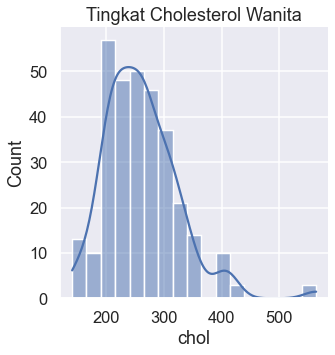

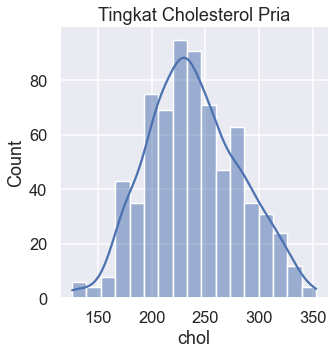

In [113]:
# visualisasi histogram chol pria dan wanita
sns.displot(df_chol_w["chol"], kde=True)
plt.title("Tingkat Cholesterol Wanita")
plt.show()

sns.displot(df_chol_p["chol"], kde=True)
plt.title("Tingkat Cholesterol Pria")
plt.show()